<h1 align="center">Búsqueda de la ruta más optima para personas en condición de silla de ruedas por medio de grafos</h1>
</br>

El siguiente código es para dibujar los grafos de dificultad y distancia de los caminos que conectan diferentes puntos de la universidad. Para esto se utiliza la librería <b><i>networkx</i></b> para crear y dibujar el grafo, y la librería <b><i>matplotlib</i></b> para crear el espacio donde se va a graficar.
<br>    
<br>
Los lugares son un diccionario que asocia una sigla y el nombre completo del lugar, para respresentar el grafo se usara la sigla. Para las aristas (<i>edges</i>) entre los nodos se emplea una lista que contiene la arista y el peso asociado
<h3>Cargar los datos</h3>

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import json

# Archivos con informacion de nodos y aristas
f = open('assets/nodes.json')
lugares = json.load(f)
f = open('assets/aristas.json')
aristas = json.load(f)

#Imprimir informacion de nodos y aristas
print("{:<15} {:<30} {:<15}".format("\t", "NODOS", ""))
print("{:<10} {:<20} {:<15} {:<15}".format('Sigla', 'Nombre', 'X', 'Y'))
for k, v in lugares.items():
    print("{:<10} {:<20} {:<15} {:<15}".format(k, v["nombre"], v["posicion"][0], v["posicion"][1]))
    
print("\n")
print("{:<3} {:<20} {:<10}".format("\t", "ARISTAS", ""))
print("{:<8} {:<12} {:<10}".format('Nodos', 'Dificultad', 'Distancia (m)'))
for k, v in aristas.items():
    print("{:<12} {:<12} {:<10}".format(k, v["dificultad"], v["distancia"]))

	               NODOS                                         
Sigla      Nombre               X               Y              
E          Entrada              423.89138       92.81478       
LC         LuisACalvo           456.62827       173.56299      
H          Humanas              308.47801       93.65721       
BB         Biblioteca           341.33291       328.6961       
C          Centic               265.43733       300.05337      
Q          Quimica              189.61833       292.39489      
JB         JUan Bautista        103.8433        265.59019      
LP         Lb Pesados           102.31161       333.7507       
LL         Lb Livianos          243.61065       192.22191      
CT         Camilo Torres        278.15041       246.13764      
M          Mecanica             365.76348       192.22191      
I          Idiomas              364.23178       388.12595      
D          Diseno               285.34939       389.65764      
L          Lago                 400      

<h3>Creación de los grafos</h3>
Para poder mostrar los grafos con la librería networkxs se creara un array para las aristas de dificultad y otro para las aristas de distancia. Estos arrays consisten de tuplas con los nodos que se conectan y el peso.

In [45]:
edgesDificultad = []
for arista in aristas.keys():
    nodos = arista.split()
    edgesDificultad.append((nodos[0], nodos[1], aristas[arista]["dificultad"]))
    
edgesDistancia = []
for arista in aristas.keys():
    nodos = arista.split()
    edgesDistancia.append((nodos[0], nodos[1], aristas[arista]["distancia"]))

nodes = lugares.keys()

# Grafo como una lista de adyacencia (usando diccionarios)
grafoDificultad = {}
grafoDistancia = {}
for node in nodes:
    aristasDif = []
    for edge in edgesDificultad:
        if node in edge:
            arista = list(edge)
            arista.remove(node)
            aristasDif.append(tuple(arista))
    grafoDificultad[node] = aristasDif
    
    aristasDis = []
    for edge in edgesDistancia:
        if node in edge:
            arista = list(edge)
            arista.remove(node)
            aristasDis.append(tuple(arista))
    grafoDistancia[node] = aristasDis
    

print("Grafo dificultad del camino:")
for key, value in grafoDificultad.items():
    print(key, value)
    
print("\nGrafo distancia del camino:")
for key, value in grafoDistancia.items():
    print(key, value)


# Grafo de dificultad del camino
G = nx.Graph()
for nodo in nodes:
    G.add_node(nodo, pos = lugares[nodo]["posicion"])
    
G.add_weighted_edges_from(edgesDificultad)
pos=nx.get_node_attributes(G,'pos')

# Grafo de distancias
D = nx.Graph()
for nodo in nodes:
    D.add_node(nodo, pos = lugares[nodo]["posicion"])
D.add_weighted_edges_from(edgesDistancia)


Grafo dificultad del camino:
E [('LC', 1), ('H', 6)]
LC [('E', 1), ('L', 2), ('M', 10)]
H [('E', 6), ('LL', 3)]
BB [('C', 1), ('I', 100), ('CT', 2), ('L', 5)]
C [('BB', 1), ('Q', 1)]
Q [('C', 1), ('JB', 1)]
JB [('Q', 1), ('LP', 1)]
LP [('JB', 1), ('D', 1)]
LL [('H', 3), ('CT', 1), ('M', 3)]
CT [('LL', 1), ('M', 2), ('BB', 2)]
M [('LL', 3), ('CT', 2), ('LC', 10)]
I [('BB', 100), ('D', 3), ('G', 9), ('L', 10), ('BI', 7)]
D [('I', 3), ('LP', 1)]
L [('LC', 2), ('G', 2), ('I', 10), ('BB', 5)]
G [('I', 9), ('L', 2), ('BI', 6)]
BI [('G', 6), ('I', 7)]

Grafo distancia del camino:
E [('LC', 120), ('H', 130)]
LC [('E', 120), ('L', 150), ('M', 92)]
H [('E', 130), ('LL', 100)]
BB [('C', 30), ('I', 55), ('CT', 35), ('L', 60)]
C [('BB', 30), ('Q', 70)]
Q [('C', 70), ('JB', 60)]
JB [('Q', 60), ('LP', 72)]
LP [('JB', 72), ('D', 180)]
LL [('H', 100), ('CT', 65), ('M', 75)]
CT [('LL', 65), ('M', 65), ('BB', 35)]
M [('LL', 75), ('CT', 65), ('LC', 92)]
I [('BB', 55), ('D', 38), ('G', 90), ('L', 30), ('BI

<h3>Dibujar los grafos</h3>

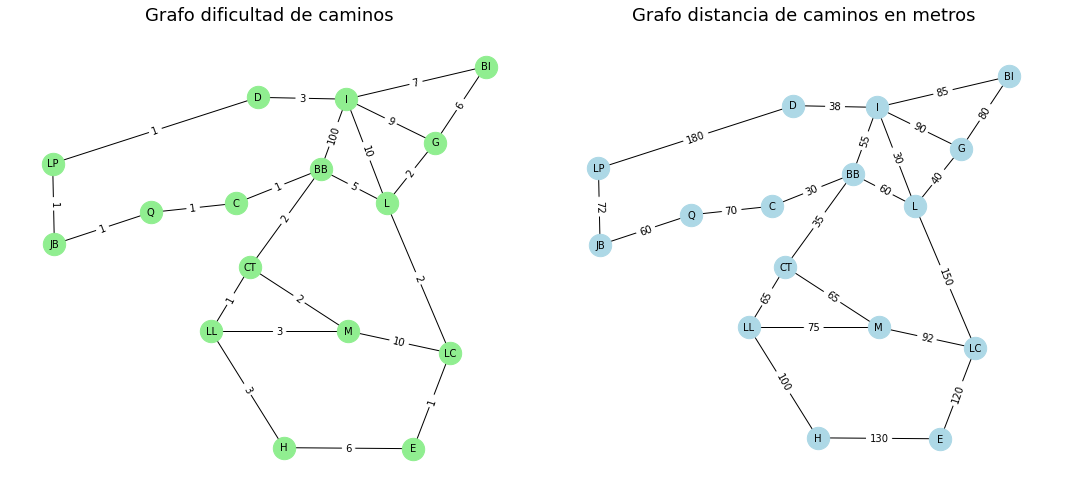

In [46]:
plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) # Crea una figura con dos columnas
ax = plt.gca() # los ejes
ax.margins(0.08)

# Dibujar grafo dificultad
plt.subplot(121) # Añadir un plot a la figura
plt.title('Grafo dificultad de caminos', fontsize=18)
plt.axis("off") # Oculta los ejes

#pos = nx.spring_layout(G, seed=9, k = 20 ) # Genera posiciones random para los nodos
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightgreen")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Edges
nx.draw_networkx_edges(G, pos, width=1, min_source_margin=1)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, labels)
#plt.savefig('assets/GrafodificultadCamino.png')

# Dibujar grafo distancias
plt.subplot(122)
plt.title('Grafo distancia de caminos en metros', fontsize=18)
plt.axis("off")
#Nodos
#pos = nx.spring_layout(D, seed=9, k = 20 )
nx.draw_networkx_nodes(D, pos, node_size=500, node_color="lightblue")
nx.draw_networkx_labels(D, pos, font_size=10, font_family="sans-serif")

#Edges
nx.draw_networkx_edges(D, pos, width=1, min_source_margin=1 )
labels = nx.get_edge_attributes(D,'weight')
nx.draw_networkx_edge_labels(D, pos, labels)
#plt.savefig('assets/GrafodistanciaCamino.png')

plt.tight_layout()
plt.show()

<h2>Implementación de la solución</h2>
Para la solución del problema se utilizará el algoritmo Dijkstra. Para esto se necesita la información del grafo como un diccionario con cada nodo y una lista de sus aristas y sus pesos. A continuación se hace el <b>tratamiento de los datos<b> que ya se disponían

<h2> Dijkstra para el camino más cómodo</h2>

In [47]:
nx.dijkstra_path(G, 'I', 'BB', weight = 'weight')

['I', 'D', 'LP', 'JB', 'Q', 'C', 'BB']

In [48]:
nx.dijkstra_path(D, 'I', 'BB', weight = 'weight')

['I', 'BB']

<h3>Implementación de Dijkstra con listas enlazadas</h3>

In [49]:
# heapq tiene implementados los algoritmos de min_heap necesarios para el funcionamiento de Dijkstra
from heapq import *


def dijkstra(graph, start):
    distances = {}
    # Inicializamos la distancia desde el nodo inicial a cualquier nodo en infinito
    # diccionario con los predecesores de cada vertice
    predecesores = {}
    for vertex in graph.keys():
        distances[vertex] = float('infinity')
        predecesores[vertex] = ''
    
    # La distancia al nodo inicial es 0
    distances[start] = 0
    
    # Introducimos el vertice inicial en el heap
    h = [(0, start)]
    n = len(graph.keys())
    visited = {}
    
    for v in distances.keys():
        visited[v] = False
        
    while len(h) > 0:
        # extraemos el vertice con la menor distancia
        l,u = heappop(h)
        # si ya lo visitamos lo saltamos
        if visited[u]:
            continue
        
        visited[u] = True
        for v, d in graph[u]:
            # si la distancia del nodo nodo que estoy visitando + la distancia al vecino
            # es menor que la distancia que tenia antes del vecino. Actualizo la distancia del vecino
            # a la mas corta. Y lo meto al heap
            if distances[u] + d < distances[v]:
                distances[v] = distances[u] + d
                heappush(h, (distances[v], v))
                predecesores[v] = u

    return distances, predecesores



In [50]:
def shortestPath(graph, start, target):
    r, predecesores = dijkstra(graph, start)
    found = False
    camino = [target]
    i = target
    while i != start:
        camino.append(predecesores[i])
        if predecesores[i] == start:
            found = True
        i = predecesores[i]
        
    return list(reversed(camino))

camino2 = shortestPath(grafoDistancia, 'I', 'BB')
print(camino2)

['I', 'BB']


In [51]:
camino = shortestPath(grafoDificultad, 'I', 'BB')
print(camino)

['I', 'D', 'LP', 'JB', 'Q', 'C', 'BB']


<h3>Camino sugerido</h3>

In [58]:
#Calcluar:
#Encuentra el peso total de un camino
#     Si necesitamos el total de la dificultad, damos como párametro grafoDificultad
#     Si necesitamos el total de la distancia, damos como párametro grafoDistancia

def pesoTotal(camino, diccionario):
    suma = 0
    for i in range((len(camino)-1)):
        a = diccionario.get(camino[i])
        for j in a:
            nodo,valor = j
            if nodo == camino[i+1]:
                suma += valor
    return suma


#Recibe dos parametros, el primero es el camino con menor dificultad y el segundo parametro es el camino mas corto
def caminoSugerido(camino1, camino2):
    
    #Informacion del camino 1 o camino menos dificil
    promedioDificultad = pesoTotal(camino1,grafoDificultad)/(len(camino1)-1)
    distanciaTotal = pesoTotal(camino1,grafoDistancia)
    
    #Informacion del camino 2 o con menor distancia
    promedioDificultad = pesoTotal(camino2,grafoDificultad)/(len(camino2)-1)
    distanciaTotal = pesoTotal(camino2,grafoDistancia)
    
    


1.3333333333333333
